# Laboratorio 07 Interpolación

#### Métodos computacionales para físicos  y astrónomos
#### Universidad de Antioquia
#### Prof: Hernan D. Salinas Jiménez & Juan Marcos Marín Ramírez

##1. Interpolación Lagrange

Consideremos la función:
\begin{equation*}
     f(x) = \frac{1}{1+25x^2}
\end{equation*}
en el intervalo $[-1, 1]$, definamos un conjunto de puntos $n+1$  equiespaciados en $[-1,1]$.

 1. Representar gráficamente la función junto al polinomio de interpolación de Lagrange, $p_n(x)$, para $n=\{ 4, 8, 12, 16, 20 \}$.
 2. Comprobar gráficamente cómo el error aumenta con $n$. Emplee la libreria, simbolica de sympy y encuente el error en la interpolación.

 Para este numeral, emplee que:


La cota del  error , viene dado por:
\begin{equation}
f(x) - P(x) = \epsilon = \frac{1}{(n+1)!} f^{(n+1)}(\xi)(x - x_0)(x - x_1) ... (x - x_n)
\end{equation},

emplee la libreria simbolica para realizar la estimación de dicha cuota, sólo para n = 4, en el punto 0.5

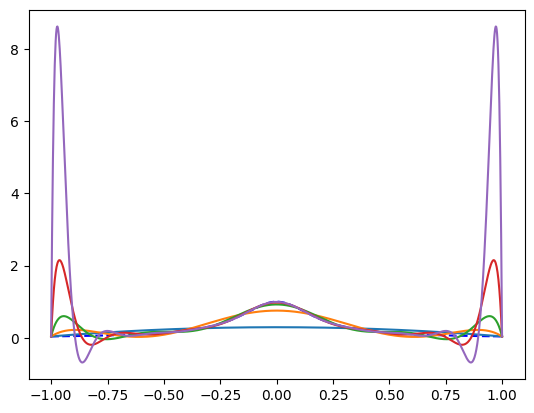

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

f=lambda x: 1/(1+25*x**2)

n=[4, 8, 12, 16, 20]
X=[np.linspace(-1, 1, i) for i in n]

L=[lagrange(x, f(x)) for x in X]
x=np.linspace(-1, 1, 1000)
plt.plot(x, f(x), "b--")
for l in L:
    plt.plot(x, l(x))


[284.7406758817256, 3185.537454631319, 36314.8310137185, 415827.8118548769, 4763612.8527809465]


Text(0, 0.5, 'Error máximo')

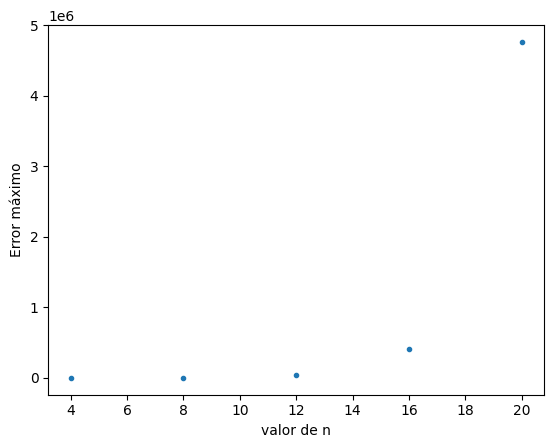

In [71]:
import sympy as sp
from math import factorial
sp.init_printing()

f_s=lambda y: 1/(1+25*y**2)

y=sp.symbols("y")

df=[sp.diff(f_s(y), y, i+1) for i in n]
prod=[]
for i in X:
    p=1
    for j in i:
        p*=(y-j)
    prod.append(p)

E=[sp.lambdify(y, 1/(factorial(n[i]+1))*df[i]*prod[i]) for i in range(len(n))]
e=[np.max(f(x)) for f in E]
print(e)

plt.plot(n, e, ".")
plt.xlabel("valor de n")
plt.ylabel("Error máximo")


In [73]:
#El error con n=4 en x=0.5 está acotado por:
E[0](0.5)

0.646550529805697

##2. Tangente

Para la función $f(x) = \tan (x)$ definida entre $-\frac{\pi}{4}$ y $\frac{\pi}{4}$, usando $N=10$ (9 intervalos). Grafique la función original y aquella interpolada usando Lagrange.

Explore el comportamiento del algoritmo de interpolación lineal al variar el número de datos utilizados.

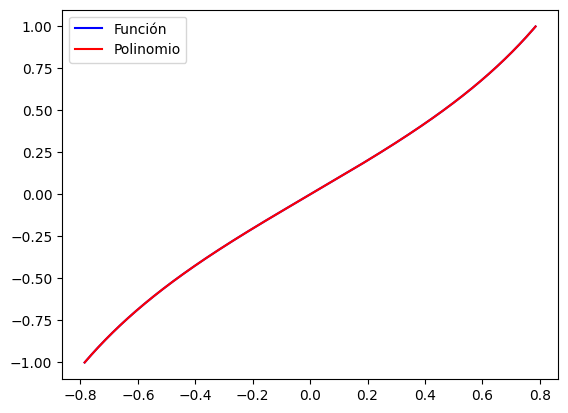

In [75]:
from scipy.interpolate import lagrange
import numpy as np
import matplotlib.pyplot as plt

# Interpolando con Lagrange
f=lambda x: np.tan(x)

x=np.linspace(-np.pi/4, np.pi/4, 1000)
x_=np.linspace(-np.pi/4, np.pi/4, 10)
L=lagrange(x_, f(x_))
plt.plot(x, f(x), "b-", label="Función")
plt.plot(x, L(x), "r-", label="Polinomio")
plt.legend()


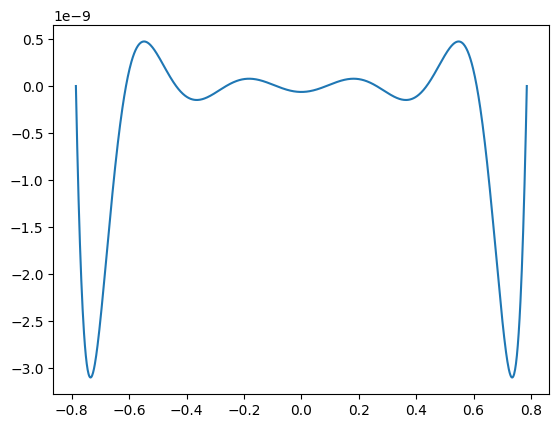

In [76]:
# Encontrando el error de interpolación
from math import factorial

y_max=np.max(abs(f(x)))

E=lambda x: (1/(factorial(9)))*y_max*(x-x_[0])*(x-x_[1])*(x-x_[2])*(x-x_[3])*(x-x_[4])*(x-x_[5])*(x-x_[6])*(x-x_[7])*(x-x_[8])*(x-x_[9])
plt.plot(x, E(x))

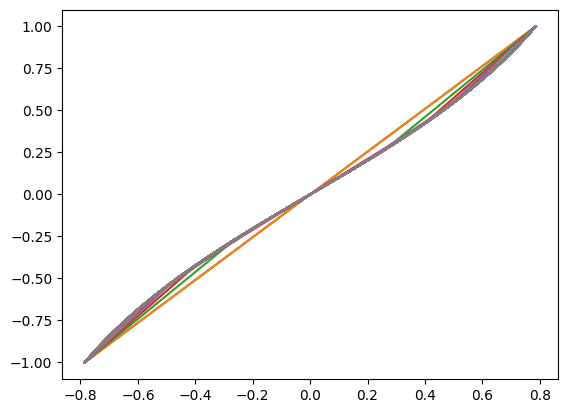

In [77]:
from scipy.interpolate import make_interp_spline
n=10
P=[np.linspace(-np.pi/4, np.pi/4, i) for i in range(2, 100)]
sp=[make_interp_spline(x, f(x), k=1) for x in P]

for s in sp:
    plt.plot(x, s(x))



##3. Datos

Usando los siguientes datos:
```
x =  np.array([1, 1.3, 1.6, 1.9, 2.2])

fx =  np.array([0.7651977,0.6200860, 0.4554022, 0.2818186, 0.1103623])
```
a)  Cree un dataframe y utilizando la interpolación de Lagrange encuentre



valores intermedios, esto es,

```
new_x_range = np.arange(1.1, 2.1, 0.1)
```
b) Haga un gráfico donde muestre los valores originales y aquellos interpolados.

c) Utilizando un método diferente a Lagrange repita el procedimiento y explique si hay alguna diferencia


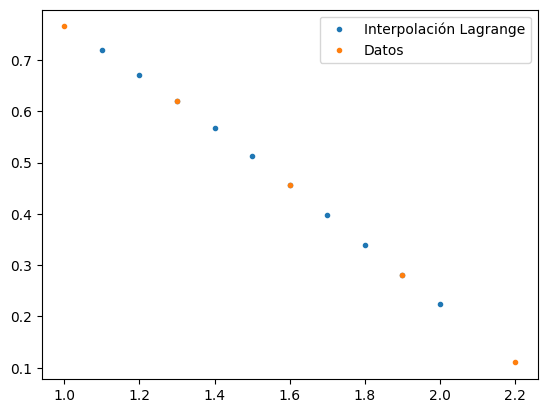

In [ ]:
from scipy.interpolate import lagrange, make_interp_spline
import pandas as pd


x =  np.array([1, 1.3, 1.6, 1.9, 2.2])
fx =  np.array([0.7651977,0.6200860, 0.4554022, 0.2818186, 0.1103623])
new_x_range = np.arange(1.1, 2.1, 0.1)
L=lagrange(x, fx)
new_fx=L(new_x_range)

df=pd.DataFrame({"x": x, "fx": fx})
dfLagrange=pd.DataFrame({"x": new_x_range, "fx": new_fx})
plt.plot(dfLagrange.x, dfLagrange.fx, ".", label="Interpolación Lagrange")
plt.plot(df.x, df.fx, ".", label="Datos")
plt.legend()


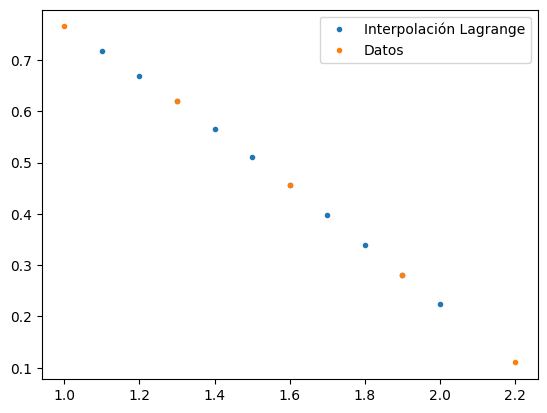

In [27]:
P=make_interp_spline(x, fx, k=1)
dfSpline=pd.DataFrame({"x":new_x_range, "fx": P(new_x_range)})

plt.plot(dfSpline.x, dfSpline.fx, ".", label="Interpolación Lagrange")
plt.plot(df.x, df.fx, ".", label="Datos")
plt.legend()

##4. Interpolación en imágenes


# 4. Spline Cúbico

Consideremos la imagen ![paloma](https://github.com/hernansalinas/autogrades/blob/main/Laboratorios_Taller/img/paloma.png?raw=true).




Con los datos dados en la tabla:

1. Representar gráficamente la imagen, usando las órdenes `imread` e `imshow` de python (estas órdenes están contenidas en el paquete `matplotlib`)

2. Definir una lista de puntos, $x_i$,$y_i$ de la paloma.

3. Representar el polinomio de interpolación de Lagrange en estos puntos, para aproximar el dibujo.

4. Repetir el proceso de interpolación mediante *splines* cúbicos. Para ello, utilizar la función `CubicSpline` (contenida en `scipy.interpolate`),


5. Comparar los resultados. ¿Alguna de las interpolaciones presenta oscilaciones? ¿A qué se debe este fenómeno?

Ref: Metodos numericos, Burden.

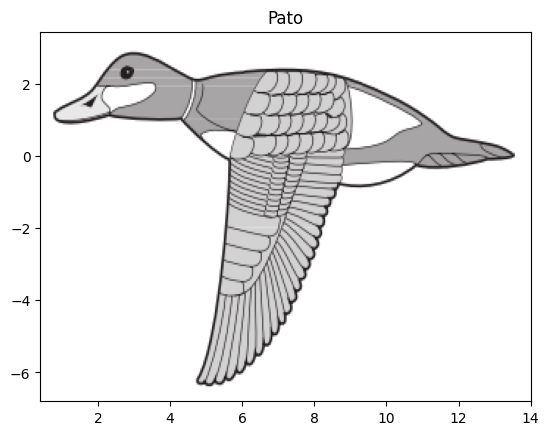

In [29]:
import urllib.request
pato='https://3.bp.blogspot.com/-8_LTrCIxVSQ/VxU-5Gq2ffI/AAAAAAAAIto/LhCDEwHKTiAbLr7IhizQwGV13YTwgpbDwCLcB/s400/pato1.png' #URL
urllib.request.urlretrieve(pato, 'pato.jpg')#Decargar la imagen
imagen_pato=plt.imread('pato.jpg') #Variable con la imagen del pato

plt.figure()
plt.title("Pato")
plt.imshow(imagen_pato, extent=(0.4, 14, -6.8, 3.45))

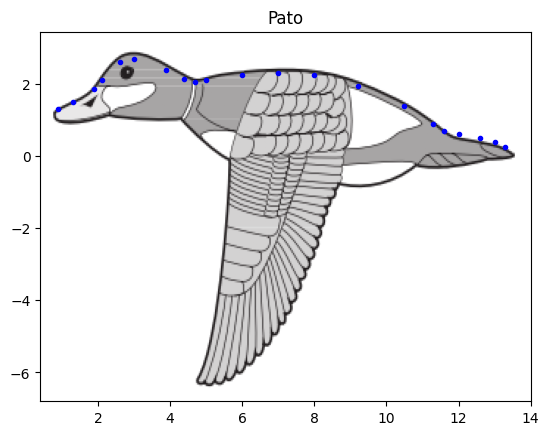

In [36]:
X=[0.9, 1.3, 1.9, 2.1, 2.6, 3, 3.9, 4.4, 4.7, 5, 6, 7, 8, 9.2, 10.5, 11.3, 11.6, 12, 12.6, 13, 13.3]
Y=[1.3, 1.5, 1.85, 2.1, 2.6, 2.7, 2.4, 2.15, 2.05, 2.1, 2.25, 2.3, 2.25, 1.95, 1.4, 0.9, 0.7, 0.6, 0.5, 0.4, 0.25]

import urllib.request
pato='https://3.bp.blogspot.com/-8_LTrCIxVSQ/VxU-5Gq2ffI/AAAAAAAAIto/LhCDEwHKTiAbLr7IhizQwGV13YTwgpbDwCLcB/s400/pato1.png' #URL
urllib.request.urlretrieve(pato, 'pato.jpg')#Decargar la imagen
imagen_pato=plt.imread('pato.jpg') #Variable con la imagen del pato

plt.figure()
plt.title("Pato")

plt.plot(X, Y, "b.")
plt.imshow(imagen_pato, extent=(0.4, 14, -6.8, 3.45))

In [45]:
L=lagrange(X, Y)

In [46]:
from scipy.interpolate import CubicSpline

P=CubicSpline(X, Y)

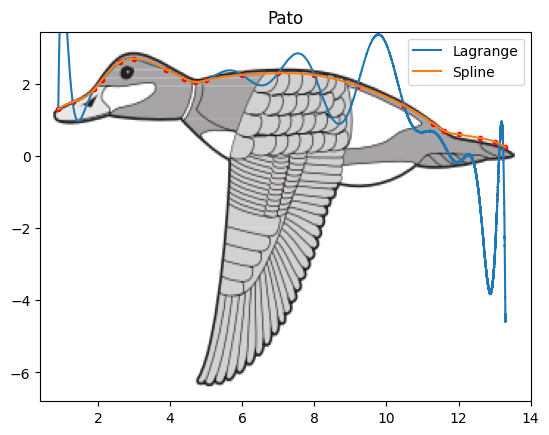

In [48]:
x=np.linspace(X[0], X[-1], 100000)

plt.figure()
plt.title("Pato")

plt.plot(X, Y, "r.")
plt.plot(x, L(x), label="Lagrange")
plt.plot(x, P(x), label="Spline")
plt.legend()
plt.imshow(imagen_pato, extent=(0.4, 14, -6.8, 3.45))

Parece que en este caso, el método del cubic spline fué más apropiado, ya que el método de lagrange presenta oscilaciones demasiado violentas.